# Pygrib and Basemap

### Main goals of this lecture:

1. Open a grib file and make a simple plot
2. Make a cross section plot
3. Read multiple grib files and extract a specific point to a timeseries

### 1. Open a grib file and make a simple plot

In [1]:
import pygrib
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
grbs = pygrib.open('data/gfs.t00z.pgrb2.0p25.f006')

The file can be iterated to show all of the grib messages. In each message there are informations like **name**, **units**, **type of level**, **level**, **valid date** and **forecast date**

In [3]:
for grb in grbs:
    print grb

1:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201702060000
2:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201702060000
3:224:224 (instant):regular_ll:unknown:level 0 220:fcst time 6 hrs:from 201702060000
4:Wind speed (gust):m s**-1 (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 201702060000
5:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201702060000
6:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201702060000
7:Relative humidity:% (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201702060000
8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201702060000
9:V component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201702060000
10:Ozone mixing ratio:kg kg**-1 (instant):regular_ll:isobaricInhPa:level

Each of those messages have a set of attributes, or **keys**, which can be used for searching

In [4]:
for key in grb.keys():
    print key

parametersVersion
definitionFilesVersion
truncateDegrees
offset
count
countTotal
unitsFactor
unitsBias
globalDomain
libraryVersion
kindOfProduct
GRIBEditionNumber
grib2divider
missingValue
ieeeFloats
section0Length
identifier
discipline
editionNumber
totalLength
sectionNumber
section1Length
numberOfSection
centre
subCentre
tablesVersion
masterDir
localTablesVersion
significanceOfReferenceTime
year
month
day
hour
minute
second
dataDate
julianDay
dataTime
productionStatusOfProcessedData
typeOfProcessedData
selectStepTemplateInterval
selectStepTemplateInstant
stepType
sectionNumber
grib2LocalSectionPresent
sectionNumber
gridDescriptionSectionPresent
section3Length
numberOfSection
sourceOfGridDefinition
numberOfDataPoints
numberOfOctectsForNumberOfPoints
interpretationOfNumberOfPoints
PLPresent
gridDefinitionTemplateNumber
shapeOfTheEarth
scaleFactorOfRadiusOfSphericalEarth
scaledValueOfRadiusOfSphericalEarth
scaleFactorOfEarthMajorAxis
scaledValueOfEarthMajorAxis
scaleFactorOfEarthMinorAx

Those **keys** can be used to filter variables. If I want the 10 metre above the ground wind, I can use the **name** key, the **typeOfLevel** and **level**. This will return a list of grib messages that have been found. Using the [0] selects the first element in that list

In [5]:
u10_grb = grbs.select(name='10 metre U wind component', typeOfLevel='heightAboveGround', level=10)[0]
v10_grb = grbs.select(name='10 metre V wind component', typeOfLevel='heightAboveGround', level=10)[0]
t2_grb = grbs.select(name='2 metre temperature', typeOfLevel='heightAboveGround', level=2)[0]

The **key** **values** can be used in my object to return a numpy array of data

In [6]:
u10 = u10_grb.values
v10 = v10_grb.values
t2 = t2_grb.values
print t2.shape, u10.shape, v10.shape

(721, 1440) (721, 1440) (721, 1440)


Using **grib_message.latslons** will return a 2D numpy array of latitudes and longitudes

In [7]:
lats, lons = u10_grb.latlons()
print lats.shape, lons.shape, lats.min(), lats.max(), lons.min(), lons.max()

(721, 1440) (721, 1440) -90.0 90.0 0.0 359.75


In [8]:
print lats
print lons

[[ 90.    90.    90.   ...,  90.    90.    90.  ]
 [ 89.75  89.75  89.75 ...,  89.75  89.75  89.75]
 [ 89.5   89.5   89.5  ...,  89.5   89.5   89.5 ]
 ..., 
 [-89.5  -89.5  -89.5  ..., -89.5  -89.5  -89.5 ]
 [-89.75 -89.75 -89.75 ..., -89.75 -89.75 -89.75]
 [-90.   -90.   -90.   ..., -90.   -90.   -90.  ]]
[[  0.00000000e+00   2.50000000e-01   5.00000000e-01 ...,   3.59250000e+02
    3.59500000e+02   3.59750000e+02]
 [  0.00000000e+00   2.50000000e-01   5.00000000e-01 ...,   3.59250000e+02
    3.59500000e+02   3.59750000e+02]
 [  0.00000000e+00   2.50000000e-01   5.00000000e-01 ...,   3.59250000e+02
    3.59500000e+02   3.59750000e+02]
 ..., 
 [  0.00000000e+00   2.50000000e-01   5.00000000e-01 ...,   3.59250000e+02
    3.59500000e+02   3.59750000e+02]
 [  0.00000000e+00   2.50000000e-01   5.00000000e-01 ...,   3.59250000e+02
    3.59500000e+02   3.59750000e+02]
 [  0.00000000e+00   2.50000000e-01   5.00000000e-01 ...,   3.59250000e+02
    3.59500000e+02   3.59750000e+02]]


To plot that data we can use **Basemap** http://matplotlib.org/basemap/users/index.html 

" _The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python (...) Basemap is geared toward the needs of earth scientists, particular oceanographers and meteorologists (...)_ "

In [9]:
from mpl_toolkits.basemap import Basemap

A simple image can be plotted using the **min** and **max** values in the lats and lons variables. We can create a map object **m** defining the lower corner and uper corner longitude and latitude, **llcrnrlon(lat)** and **urcrnrlon(lat)**. 
Then we can use the matplotlib functions to make the temperature and wind plot.

/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


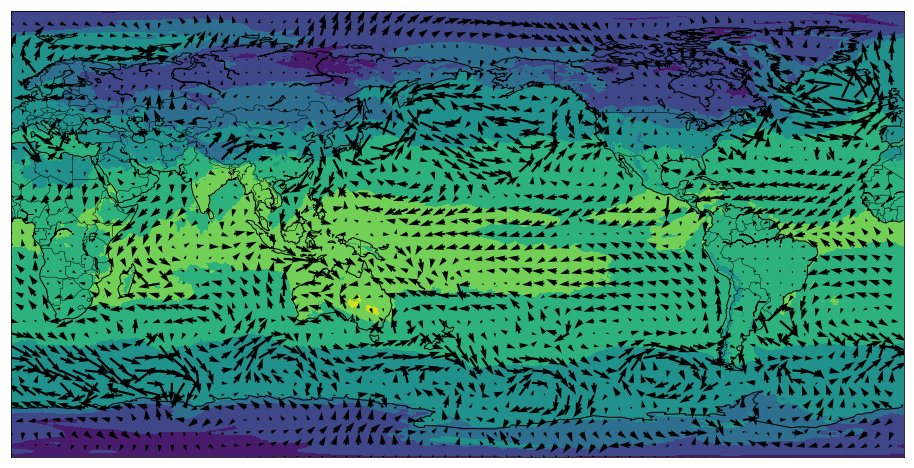

In [10]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=lons.min(), llcrnrlat=lats.min(), urcrnrlon=lons.max(), urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 20

cs = m.contourf(lons, lats, t2)
qv = m.quiver(lons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

There are many different projections to choose from in Basemap:

* Azimuthal Equidistant Projection
* Gnomonic Projection
* **Orthographic Projection**
* Geostationary Projection
* Near-Sided Perspective Projection
* Mollweide Projection
* Hammer Projection
* Robinson Projection
* Eckert IV Projection
* Kavrayskiy VII Projection
* McBryde-Thomas Flat Polar Quartic
* Sinusoidal Projection
* Equidistant Cylindrical Projection
* Cassini Projection
* Mercator Projection
* Transverse Mercator Projection
* Oblique Mercator Projection
* Polyconic Projection
* Miller Cylindrical Projection
* Gall Stereographic Projection
* Cylindrial Equal-Area Projection
* Lambert Conformal Projection
* Lambert Azimuthal Equal Area Projection
* Stereographic Projection
* Equidistant Conic Projection
* Albers Equal Area Projection
* Polar Stereographic Projection
* Polar Lambert Azimuthal Projection
* **Polar Azimuthal Equidistant Projection**
* van der Grinten Projection

/home/rafaelca/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


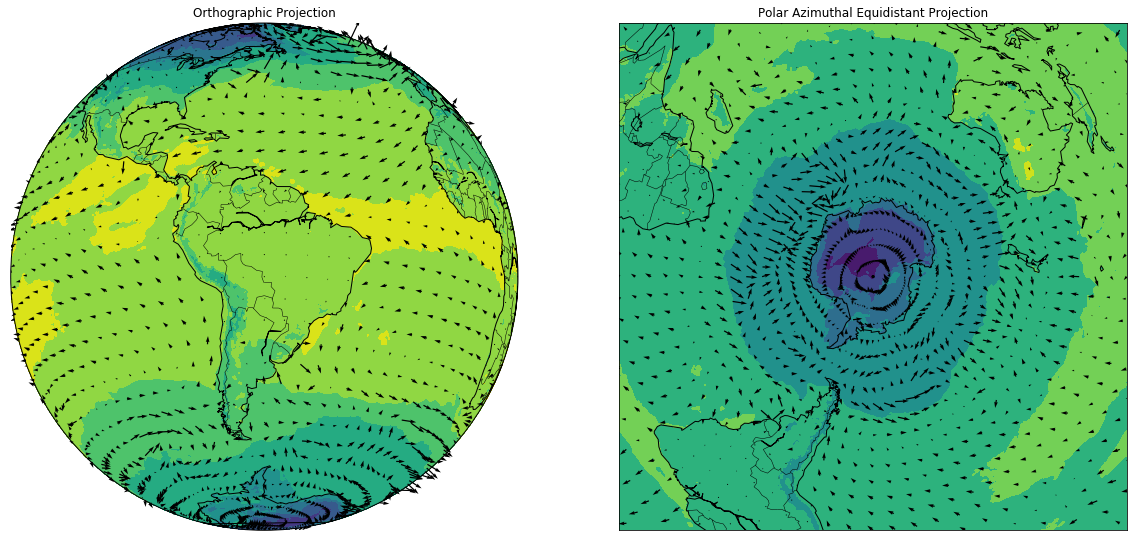

In [11]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(121)
ax1.set_title('Orthographic Projection')

m = Basemap(projection='ortho',lat_0=-15,lon_0=300, ax=ax1)

m.drawcoastlines()
m.drawcountries()

skip = 20

x, y = m(lons, lats)

cs = m.contourf(x, y, t2)
qv = m.quiver(x[::skip, ::skip], y[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

ax2 = fig.add_subplot(122)
ax2.set_title('Polar Azimuthal Equidistant Projection')

m = Basemap(projection='spaeqd',boundinglat=-10,lon_0=270, ax=ax2)

m.drawcoastlines()
m.drawcountries()

skip = 20

x, y = m(lons, lats)

cs = m.contourf(x, y, t2)
qv = m.quiver(x[::skip, ::skip], y[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

As my data is sorted from 0 to 360 in longitude, you need to reorder them from -180 to 180. To do so we can create a functions called **flip_grid** that takes the variable that we want to reorder and my longitude 2D array. An **if** statment can be used to check if the variable is 2D or 3D.

In [12]:
def flip_grid(var, lons):
    fltr = lons[0] >= 180
    newlons = np.concatenate(((lons - 360)[:, fltr], lons[:, ~fltr]), axis=-1)
    if var.ndim == 2:
        newvar = np.concatenate((var[:, fltr], var[:, ~fltr]), axis=-1)
    elif var.ndim == 3:
        newvar = np.concatenate((var[:, :, fltr], var[:, :, ~fltr]), axis=-1)
        
    return newvar, newlons

The **flip_grid** function is used to reorder u10, v10 and t2 variables, and the data is ploted

In [13]:
u10, newlons = flip_grid(u10, lons)
v10, newlons = flip_grid(v10, lons)
t2, newlons = flip_grid(t2, lons)

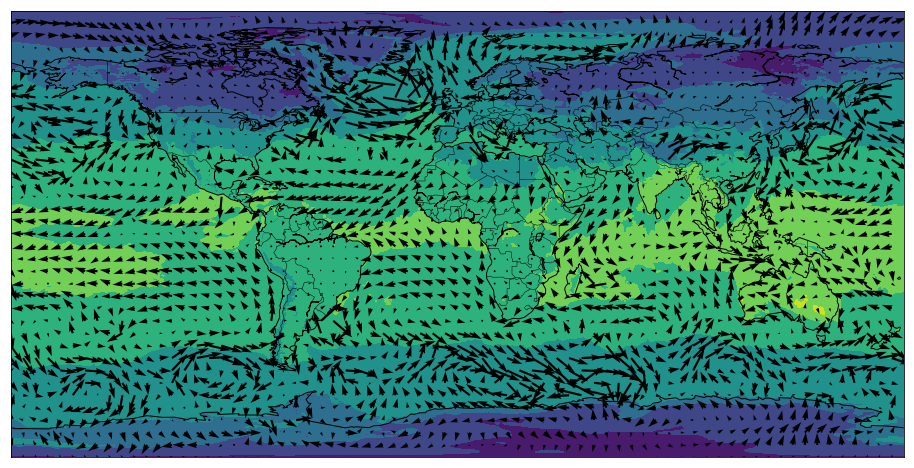

In [14]:
fig = plt.figure(figsize=(16,35))
m = Basemap(llcrnrlon=newlons.min(), llcrnrlat=lats.min(), urcrnrlon=newlons.max(), urcrnrlat=lats.max())

m.drawcoastlines()
m.drawcountries()

skip = 20

cs = m.contourf(newlons, lats, t2)
qv = m.quiver(newlons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip])

To make a more regional plot, we can set different boundary lattitudes and longitudes. Also, we are able to use most of the matplotlib tools to make a more sofisticated plot

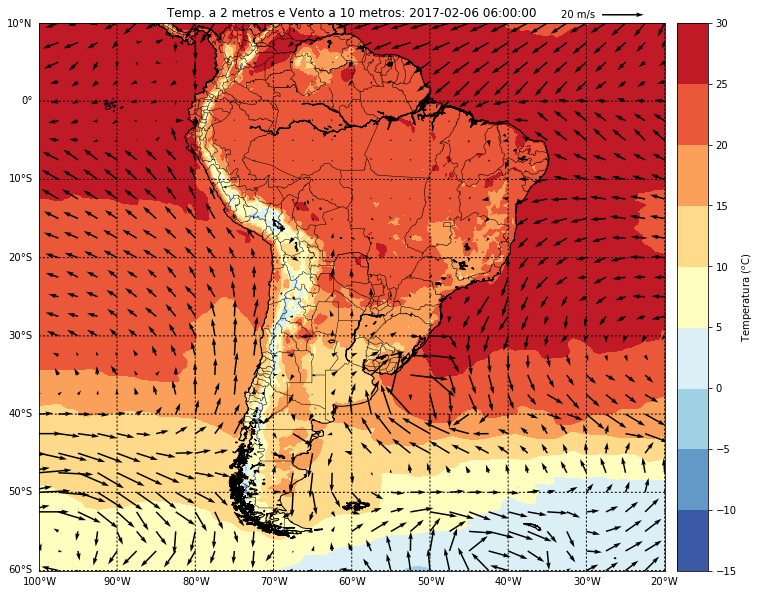

In [15]:
fig = plt.figure(figsize=(12,25))
m = Basemap(llcrnrlon=-100, llcrnrlat=-60, urcrnrlon=-20, urcrnrlat=10, resolution='i')

parallels = np.arange(-90, 90, 10)
meridians = np.arange(0, 360, 10)

m.drawcoastlines()
m.drawcountries()
m.drawstates() # bad idea!!! >.<
m.drawmeridians(meridians, labels=[0, 0, 0, 1])
m.drawparallels(parallels, labels=[1, 0, 0, 0])

skip = 10

plt.title('Temp. a 2 metros e Vento a 10 metros: %s' % u10_grb.validDate)

cs = m.contourf(newlons, lats, t2 - 273.15, cmap='RdYlBu_r')
cbar = m.colorbar(cs)
cbar.set_label(r'Temperatura ($^{o}$C)')
qv = m.quiver(newlons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip], scale=300)
qk = plt.quiverkey(qv, 0.9, 1.015, 20, '20 m/s', labelpos='W')

We can use the functions **readshapefile** to load a shapefile with a updated version of the political boundaries of the brazilian states. (_For more examples on how to use it, check the following link: http://basemaptutorial.readthedocs.io/en/latest/shapefile.html_ )

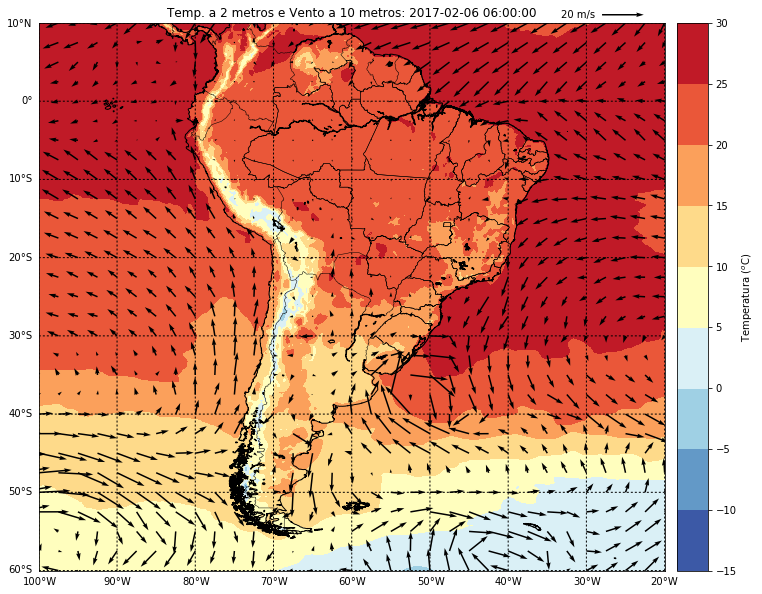

In [16]:
fig = plt.figure(figsize=(12,25))
m = Basemap(llcrnrlon=-100, llcrnrlat=-60, urcrnrlon=-20, urcrnrlat=10, resolution='i')

parallels = np.arange(-90, 90, 10)
meridians = np.arange(0, 360, 10)

m.drawcoastlines()
m.drawcountries()
m.readshapefile('/home/rafaelca/estados_2010_shapefile/estados_2010', 'estado_2010') # much better now :D
m.drawmeridians(meridians, labels=[0, 0, 0, 1])
m.drawparallels(parallels, labels=[1, 0, 0, 0])

skip = 10

plt.title('Temp. a 2 metros e Vento a 10 metros: %s' % u10_grb.validDate)

cs = m.contourf(newlons, lats, t2 - 273.15, cmap='RdYlBu_r')
cbar = m.colorbar(cs)
cbar.set_label(r'Temperatura ($^{o}$C)')
qv = m.quiver(newlons[::skip, ::skip], lats[::skip, ::skip], u10[::skip, ::skip], v10[::skip, ::skip], scale=300)
qk = plt.quiverkey(qv, 0.9, 1.015, 20, '20 m/s', labelpos='W')

### 2. Make a cross section plot

To make a cross section of the zonal wind, for example, we need a list of the variable **u** for each isobaric level 

In [17]:
list_of_messages = grbs.select(shortName='u', typeOfLevel='isobaricInhPa')
for message in list_of_messages:
    print message

8:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 6 hrs:from 201702060000
14:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 6 hrs:from 201702060000
20:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 300 Pa:fcst time 6 hrs:from 201702060000
26:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 6 hrs:from 201702060000
32:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 700 Pa:fcst time 6 hrs:from 201702060000
38:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 1000 Pa:fcst time 6 hrs:from 201702060000
45:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 2000 Pa:fcst time 6 hrs:from 201702060000
52:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 3000 Pa:fcst time 6 hrs:from 201702060000
59:U component of wind:m s**-1 (instant):regular_ll:isobaricInhPa:level 5000 Pa:fcst time 6 hr

A variable **up** is then initialized as an empty list so it can be filled with the 2D array of **u** for each of the isobaric levels. A second variable **lev** is also created to be filled with the isobaric levels

In [18]:
up = []
lev = []

for grb in list_of_messages:
    up.append(grb.values)
    lev.append(grb.level)
    
up = np.array(up)
lev = np.array(lev)

print lev, lev.shape, up.shape

[   1    2    3    5    7   10   20   30   50   70  100  150  200  250  300
  350  400  450  500  550  600  650  700  750  800  850  900  925  950  975
 1000] (31,) (31, 721, 1440)


Next, a function **find_nearest** is created to find the nearest grid point for a given location, based on the distance between points

In [19]:
def find_nearest(x, y, gridx, gridy):

    distance = (gridx - x)**2 + (gridy - y)**2
    idx = np.where(distance == distance.min())
    
    return [idx[0][0], idx[1][0]]

Using, for example, the latitude and longitude of São Paulo (**lat = -23.650000** and **lon = -46.616667**)

In [20]:
idx = find_nearest(-46.616667, -23.650000, newlons, lats)

print newlons[idx[0], idx[1]], lats[idx[0], idx[1]]

-46.5 -23.75


Selecting the index idx[1], which means the longitude, we can make a plot for **up[:, :, idx[1]]** which is the zonal wind for all levels, all latitudes in longitude nearest to -46.616667

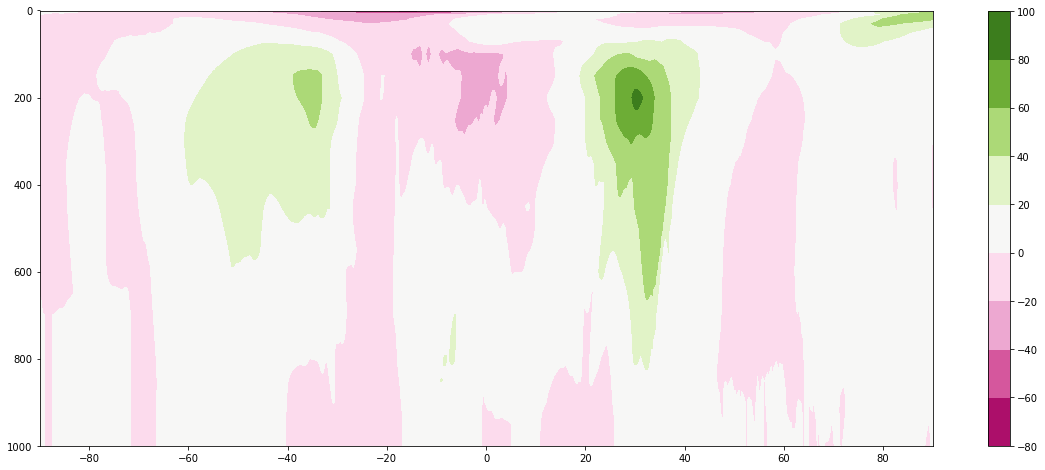

In [21]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

newlats, levs = np.meshgrid(lats[:, idx[1]], lev)

cs = ax.contourf(newlats, levs, up[:, :, idx[1]], cmap='PiYG')
cbar = plt.colorbar(cs)
ax.invert_yaxis()

### 3. Read multiple grib files and extract a specific point to a timeseries

To read multiple grib files we need to make a for loop to save the variables of interest in a numpy array. The following steps are followed below:
* The variables to be saved are initialized as empty lists
* The grib files are opened one by one
* The variables are then selected and appended to the list
* The variables are then tranformed to a numpy array

In [23]:
u10 = []
v10 = []
dates = []

import os
list_of_files = os.listdir('data')

for gribfile in sorted(list_of_files):
    if gribfile.startswith('gfs.t00z.pgrb2.0p25'):
        
        infile = os.path.join('data', gribfile)
        
        print 'Open file: %s' % infile
        grbs = pygrib.open(infile)
            
        u10_grb = grbs.select(name='10 metre U wind component', typeOfLevel='heightAboveGround', level=10)[0]
        v10_grb = grbs.select(name='10 metre V wind component', typeOfLevel='heightAboveGround', level=10)[0]

        u10.append(u10_grb.values)
        v10.append(v10_grb.values)
        
        dates.append(u10_grb.validDate)
        grbs.close()
        
lats, lons = u10_grb.latlons()
            
u10 = np.array(u10)
v10 = np.array(v10)

Open file: data/gfs.t00z.pgrb2.0p25.f003
Open file: data/gfs.t00z.pgrb2.0p25.f006
Open file: data/gfs.t00z.pgrb2.0p25.f009
Open file: data/gfs.t00z.pgrb2.0p25.f012
Open file: data/gfs.t00z.pgrb2.0p25.f015
Open file: data/gfs.t00z.pgrb2.0p25.f018
Open file: data/gfs.t00z.pgrb2.0p25.f021
Open file: data/gfs.t00z.pgrb2.0p25.f024
Open file: data/gfs.t00z.pgrb2.0p25.f027
Open file: data/gfs.t00z.pgrb2.0p25.f030
Open file: data/gfs.t00z.pgrb2.0p25.f033
Open file: data/gfs.t00z.pgrb2.0p25.f036
Open file: data/gfs.t00z.pgrb2.0p25.f039
Open file: data/gfs.t00z.pgrb2.0p25.f042
Open file: data/gfs.t00z.pgrb2.0p25.f045
Open file: data/gfs.t00z.pgrb2.0p25.f048
Open file: data/gfs.t00z.pgrb2.0p25.f051
Open file: data/gfs.t00z.pgrb2.0p25.f054
Open file: data/gfs.t00z.pgrb2.0p25.f057
Open file: data/gfs.t00z.pgrb2.0p25.f060
Open file: data/gfs.t00z.pgrb2.0p25.f063
Open file: data/gfs.t00z.pgrb2.0p25.f066
Open file: data/gfs.t00z.pgrb2.0p25.f069
Open file: data/gfs.t00z.pgrb2.0p25.f072
Open file: data/

Intead of using:
```
list_of_files = os.listdir('.')

for infile in sorted(list_of_files):
    if infile.startswith('gfs.t00z.pgrb2.0p25'):
```

We can use the **glob** function for **glob** library:
```
list_of_files = glob('gfs.t00z.pgrb2.0p25*')

for infile in sorted(list_of_files):
```

In [24]:
u10 = []
v10 = []
dates = []

from glob import glob
list_of_files = glob('data/gfs.t00z.pgrb2.0p25*')

for infile in sorted(list_of_files):
        
    print 'Open file: %s' % infile
    grbs = pygrib.open(infile)

    u10_grb = grbs.select(name='10 metre U wind component', typeOfLevel='heightAboveGround', level=10)[0]
    v10_grb = grbs.select(name='10 metre V wind component', typeOfLevel='heightAboveGround', level=10)[0]

    u10.append(u10_grb.values)
    v10.append(v10_grb.values)

    dates.append(u10_grb.validDate)
    grbs.close()
        
lats, lons = u10_grb.latlons()
            
u10 = np.array(u10)
v10 = np.array(v10)

Open file: data/gfs.t00z.pgrb2.0p25.f003
Open file: data/gfs.t00z.pgrb2.0p25.f006
Open file: data/gfs.t00z.pgrb2.0p25.f009
Open file: data/gfs.t00z.pgrb2.0p25.f012
Open file: data/gfs.t00z.pgrb2.0p25.f015
Open file: data/gfs.t00z.pgrb2.0p25.f018
Open file: data/gfs.t00z.pgrb2.0p25.f021
Open file: data/gfs.t00z.pgrb2.0p25.f024
Open file: data/gfs.t00z.pgrb2.0p25.f027
Open file: data/gfs.t00z.pgrb2.0p25.f030
Open file: data/gfs.t00z.pgrb2.0p25.f033
Open file: data/gfs.t00z.pgrb2.0p25.f036
Open file: data/gfs.t00z.pgrb2.0p25.f039
Open file: data/gfs.t00z.pgrb2.0p25.f042
Open file: data/gfs.t00z.pgrb2.0p25.f045
Open file: data/gfs.t00z.pgrb2.0p25.f048
Open file: data/gfs.t00z.pgrb2.0p25.f051
Open file: data/gfs.t00z.pgrb2.0p25.f054
Open file: data/gfs.t00z.pgrb2.0p25.f057
Open file: data/gfs.t00z.pgrb2.0p25.f060
Open file: data/gfs.t00z.pgrb2.0p25.f063
Open file: data/gfs.t00z.pgrb2.0p25.f066
Open file: data/gfs.t00z.pgrb2.0p25.f069
Open file: data/gfs.t00z.pgrb2.0p25.f072
Open file: data/

Now the same steps that were performed earlier are repeated now:
* Flip grid from 0 to 360 to -180 to 180
* Find the nearest point to São Paulo (**lat = -23.650000** and **lon = -46.616667**)

In [25]:
u10, newlons = flip_grid(u10, lons)
v10, newlons = flip_grid(v10, lons)

In [26]:
idx = find_nearest(-46.616667, -23.650000, newlons, lats)

Import pandas to create a dataframe with dates as index and then save it to a csv file

In [27]:
import pandas as pd

data = {'u10': u10[:, idx[0], idx[1]], 'v10': v10[:, idx[0], idx[1]]}

df = pd.DataFrame(data, index=dates)

print df

                      u10   v10
2017-02-06 03:00:00 -0.04 -0.78
2017-02-06 06:00:00  0.34 -1.44
2017-02-06 09:00:00  0.65 -1.59
2017-02-06 12:00:00  0.70  0.66
2017-02-06 15:00:00 -0.22  2.87
2017-02-06 18:00:00 -0.93  3.06
2017-02-06 21:00:00 -1.34  2.82
2017-02-07 00:00:00 -0.55  0.96
2017-02-07 03:00:00  0.28  0.48
2017-02-07 06:00:00  0.69  0.78
2017-02-07 09:00:00  0.95  0.60
2017-02-07 12:00:00  0.05  1.54
2017-02-07 15:00:00 -0.55  2.85
2017-02-07 18:00:00 -0.80  4.52
2017-02-07 21:00:00 -0.99  3.90
2017-02-08 00:00:00 -0.90  2.63
2017-02-08 03:00:00 -0.38  1.80
2017-02-08 06:00:00  0.02  1.20
2017-02-08 09:00:00  0.63  0.89
2017-02-08 12:00:00 -0.30  2.10
2017-02-08 15:00:00 -1.32  3.46
2017-02-08 18:00:00 -1.67  5.06
2017-02-08 21:00:00 -2.04  3.93
2017-02-09 00:00:00 -1.53  2.46
2017-02-09 03:00:00 -1.10  2.21
2017-02-09 06:00:00 -0.15  1.93
2017-02-09 09:00:00  0.13  1.61
2017-02-09 12:00:00 -0.52  2.72
2017-02-09 15:00:00 -0.48  3.48
2017-02-09 18:00:00 -1.17  5.54
2017-02-

In [28]:
df.to_csv('data.csv', sep=';')